In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
df_train=pd.read_csv("train.csv",parse_dates=['date'], index_col='date')
df_test=pd.read_csv("test.csv",parse_dates=['date'], index_col='date')
df_train['month']=df_train.index.month
df_train['day']=df_train.index.day
df_test['month']=df_test.index.month
df_test['day']=df_test.index.day

In [38]:
df_train['product_id'].nunique()

3288

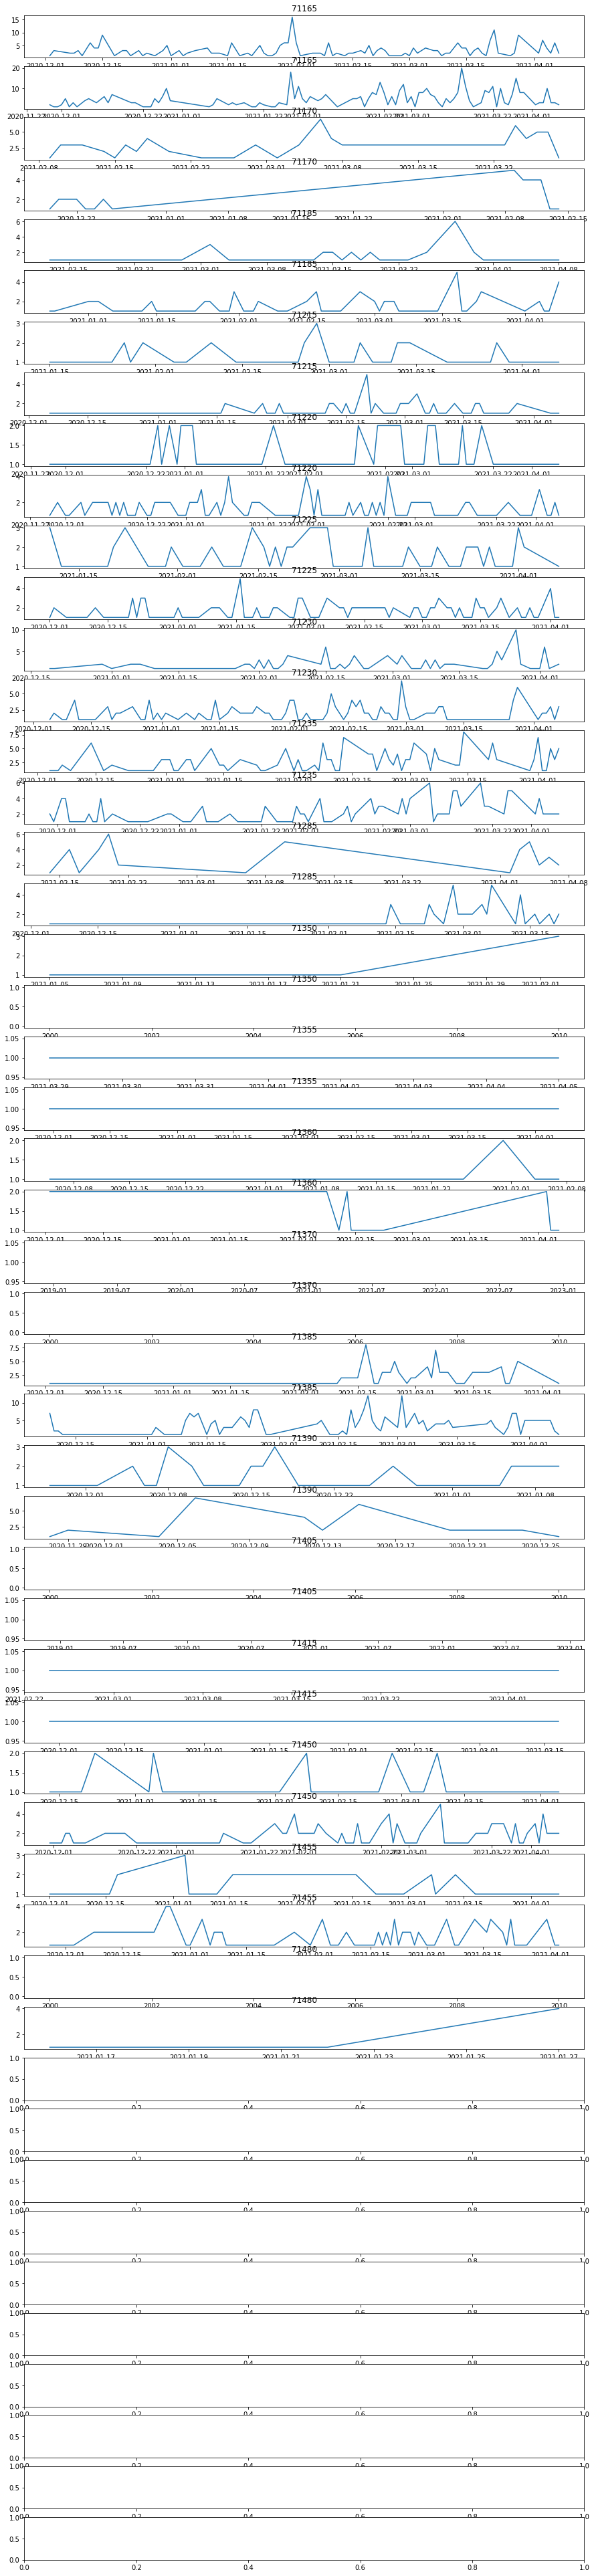

In [48]:
fig, axes = plt.subplots(50)
fig.set_figheight(70)
fig.set_figwidth(15)
for i,tek_prod_id in enumerate(df_test['product_id'].unique()[0:20]):
    for j,tek_store_id in enumerate([0,1]):
        tek_df=df_train[df_train['product_id']==tek_prod_id]
        tek_df=tek_df[tek_df['warehouse_id']==tek_store_id]
        axes[2*i+j].plot(tek_df['quantity']) 
        axes[2*i+j].set_title(tek_prod_id) 

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [132]:
tek_df=df_train[df_train['product_id']==71285]
tek_df=tek_df[tek_df['warehouse_id']==0]
train=tek_df[tek_df.index.month!=4]
val=tek_df[tek_df.index.month==4]
print(len(val))
train.head(2)

6


,warehouse_id,product_id,quantity,id,month,day
date,,,,,,
2021-02-14,0,71285,1,456,2,14
2021-02-16,0,71285,4,457,2,16


In [133]:
model1 = SimpleExpSmoothing(np.asarray(train.quantity)).fit(smoothing_level=0.7,optimized=False)
model1.forecast(len(val))

array([3.9760409, 3.9760409, 3.9760409, 3.9760409, 3.9760409, 3.9760409])

In [134]:
model2 = ExponentialSmoothing(np.asarray(train.quantity).astype(float)).fit()
model2.forecast(len(val))

array([3., 3., 3., 3., 3., 3.])

In [151]:
model3 = Holt(np.array(train.quantity).astype(float)).fit()
forecast=np.round(model3.forecast(len(val)))
forecast

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


array([3., 3., 3., 3., 3., 3.])

In [152]:
print(mean_squared_error(val.quantity,forecast))

1.8333333333333333


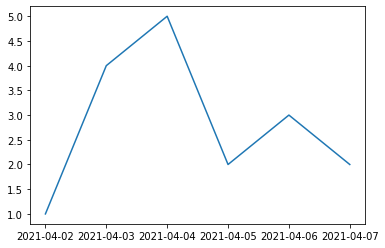

In [153]:
plt.plot(val['quantity'])

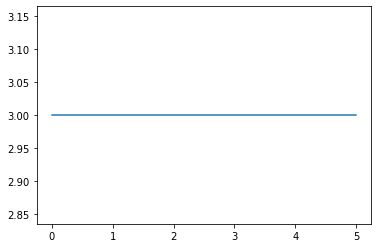

In [154]:
plt.plot(forecast)

In [179]:
otv_df=pd.DataFrame(columns=['id'])
for tek_prod_id in tqdm(df_test['product_id'].unique()):
    for tek_store_id in [0,1]:
        #print(tek_prod_id,tek_store_id)
        tek_train_df=df_train[df_train['product_id']==tek_prod_id]
        tek_train_df=tek_train_df[tek_train_df['warehouse_id']==tek_store_id]
        
        tek_test_df=df_test[df_test['product_id']==tek_prod_id]
        tek_test_df=tek_test_df[tek_test_df['warehouse_id']==tek_store_id]
        
        if (len(tek_train_df)>1):
            #print(np.array(tek_train_df.quantity).astype(float).shape)
            model3 = Holt(np.array(tek_train_df.quantity).astype(float)).fit()
            forecast=np.round(model3.forecast(len(tek_test_df)))
        elif (len(tek_train_df)==1):
            forecast=tek_train_df.quantity[0]*np.ones(len(tek_test_df))
        else:
            forecast=2*np.ones(len(tek_test_df))
        
        newt=tek_test_df.copy()[['id']]
        newt['prediction'] = forecast
        otv_df = pd.concat((otv_df,newt), axis = 0,sort=True)
        
    

otv_df.shape


  0%|          | 0/3288 [00:00<?, ?it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  0%|          | 2/3288 [00:00<27:46,  1.97it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  0%|          | 4/3288 [00:01<23:08,  2.36it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  0%|          | 5/3288 [00:02<23:27,  2.33it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/


  1%|          | 39/3288 [00:16<24:42,  2.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  1%|          | 40/3288 [00:17<24:42,  2.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  1%|          | 41/3288 [00:17<26:34,  2.04it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWar

  2%|▏         | 75/3288 [00:29<16:25,  3.26it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  2%|▏         | 76/3288 [00:30<16:29,  3.25it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  2%|▏         | 77/3288 [00:30<16:13,  3.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarn


  3%|▎         | 115/3288 [00:42<16:52,  3.13it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  4%|▎         | 116/3288 [00:42<17:01,  3.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  4%|▎         | 117/3288 [00:42<16:40,  3.17it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


  5%|▍         | 158/3288 [00:55<15:50,  3.29it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  5%|▍         | 159/3288 [00:55<16:11,  3.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  5%|▍         | 160/3288 [00:55<16:17,  3.20it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  5%|▍         | 162/3288 [00:56<15:55,  3.27it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  5%|▍         | 163/3288 [00:56<15:41,  3.32it/s]/

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  6%|▌         | 189/3288 [01:07<20:51,  2.48it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  6%|▌         | 190/3288 [01:07<22:19,  2.31it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  6%|▌         | 191/3288 [01:08<22:04,  2.34it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


  7%|▋         | 233/3288 [01:23<15:33,  3.27it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  7%|▋         | 234/3288 [01:23<15:20,  3.32it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  7%|▋         | 235/3288 [01:23<15:17,  3.33it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  7%|▋         | 236/3288 [01:24<15:18,  3.32it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  7%|▋         | 237/3288 [01:24<15:18,  3.32it/s]/


  8%|▊         | 279/3288 [01:36<15:27,  3.24it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  9%|▊         | 280/3288 [01:36<15:25,  3.25it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  9%|▊         | 281/3288 [01:37<15:14,  3.29it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

  9%|▊         | 284/3288 [01:38<15:10,  3.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 10%|▉         | 323/3288 [01:49<13:57,  3.54it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 10%|▉         | 325/3288 [01:50<14:00,  3.52it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 10%|▉         | 326/3288 [01:50<14:11,  3.48it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


 11%|█         | 368/3288 [02:03<14:19,  3.40it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 11%|█▏        | 370/3288 [02:03<14:04,  3.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 11%|█▏        | 371/3288 [02:04<14:13,  3.42it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 11%|█▏        | 372/3288 [02:04<14:06,  3.44it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 11%|█▏        | 374/3288 [02:05<14:17,  3.40it/s]/

 13%|█▎        | 412/3288 [02:18<17:46,  2.70it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 13%|█▎        | 414/3288 [02:19<16:45,  2.86it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 13%|█▎        | 416/3288 [02:20<16:48,  2.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceW


 14%|█▍        | 455/3288 [02:36<16:10,  2.92it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 14%|█▍        | 460/3288 [02:38<18:12,  2.59it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 14%|█▍        | 461/3288 [02:38<18:53,  2.49it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


 15%|█▌        | 504/3288 [02:57<16:30,  2.81it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 15%|█▌        | 505/3288 [02:57<15:35,  2.97it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 15%|█▌        | 507/3288 [02:58<16:43,  2.77it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 15%|█▌        | 508/3288 [02:58<15:56,  2.91it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 18%|█▊        | 576/3288 [03:23<14:52,  3.04it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 18%|█▊        | 580/3288 [03:24<15:46,  2.86it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 18%|█▊        | 583/3288 [03:25<19:02,  2.37it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 18%|█▊        | 591/3288 [03:28<17:07,  2.63it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 19%|█▉        | 637/3288 [03:45<15:18,  2.89it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 19%|█▉        | 639/3288 [03:46<15:16,  2.89it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 19%|█▉        | 640/3288 [03:46<15:20,  2.88it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 19%|█▉        | 641/3288 [03:46<15:39,  2.82it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 21%|██        | 691/3288 [04:04<15:25,  2.80it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 21%|██        | 692/3288 [04:04<15:15,  2.83it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 21%|██        | 694/3288 [04:05<15:14,  2.84it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 21%|██        | 696/3288 [04:06<15:09,  2.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packa

 23%|██▎       | 750/3288 [04:25<17:18,  2.44it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 23%|██▎       | 755/3288 [04:27<16:02,  2.63it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 23%|██▎       | 759/3288 [04:29<15:42,  2.68it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 23%|██▎       | 763/3288 [04:31<18:58,  2.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 23%|██▎       | 766/3288 [04:32<15:37,  2.69it/s]/U


 25%|██▍       | 817/3288 [04:51<13:08,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 25%|██▍       | 819/3288 [04:52<13:10,  3.12it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 25%|██▍       | 820/3288 [04:52<13:02,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 25%|██▌       | 822/3288 [04:53<13:45,  2.99it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 26%|██▌       | 854/3288 [05:03<12:51,  3.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 26%|██▌       | 855/3288 [05:04<13:10,  3.08it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 26%|██▌       | 856/3288 [05:04<12:58,  3.12it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 26%|██▌       | 857/3288 [05:04<13:06,  3.09it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 27%|██▋       | 895/3288 [05:16<12:06,  3.29it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 27%|██▋       | 897/3288 [05:17<12:04,  3.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 27%|██▋       | 898/3288 [05:17<12:08,  3.28it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


 28%|██▊       | 927/3288 [05:26<12:25,  3.17it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 28%|██▊       | 928/3288 [05:27<12:23,  3.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 28%|██▊       | 929/3288 [05:27<14:51,  2.65it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 28%|██▊       | 930/3288 [05:27<14:13,  2.76it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packa


 30%|██▉       | 970/3288 [05:40<12:21,  3.13it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 30%|██▉       | 971/3288 [05:40<12:14,  3.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 30%|██▉       | 972/3288 [05:41<12:20,  3.13it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergence


 31%|███       | 1015/3288 [05:54<13:08,  2.88it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 31%|███       | 1017/3288 [05:55<13:47,  2.75it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 31%|███       | 1018/3288 [05:55<15:21,  2.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 31%|███       | 1024/3288 [05:58<13:30,  2.79it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 32%|███▏      | 1061/3288 [06:10<11:24,  3.25it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 32%|███▏      | 1065/3288 [06:12<13:26,  2.76it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 32%|███▏      | 1067/3288 [06:12<12:09,  3.04it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 32%|███▏      | 1068/3288 [06:12<11:47,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 34%|███▍      | 1120/3288 [06:33<16:22,  2.21it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 34%|███▍      | 1121/3288 [06:34<16:32,  2.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 34%|███▍      | 1123/3288 [06:35<17:46,  2.03it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 34%|███▍      | 1125/3288 [06:35<14:34,  2.47it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-p

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 35%|███▌      | 1159/3288 [06:48<14:30,  2.44it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 35%|███▌      | 1160/3288 [06:49<14:56,  2.37it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 35%|███▌      | 1164/3288 [06:51<24:33,  1.44it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 35%|███▌      | 1165/3288 [06:52<22:30,  1.57it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 37%|███▋      | 1209/3288 [07:14<22:31,  1.54it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 37%|███▋      | 1210/3288 [07:15<20:37,  1.68it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 37%|███▋      | 1214/3288 [07:16<15:47,  2.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Converge

 38%|███▊      | 1254/3288 [07:34<18:09,  1.87it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 38%|███▊      | 1256/3288 [07:35<19:36,  1.73it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 38%|███▊      | 1257/3288 [07:35<19:09,  1.77it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 38%|███▊      | 1258/3288 [07:36<17:56,  1.89it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-pa

 40%|███▉      | 1300/3288 [07:56<13:46,  2.41it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 40%|███▉      | 1304/3288 [07:57<15:23,  2.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 40%|███▉      | 1305/3288 [07:58<16:31,  2.00it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 40%|███▉      | 1306/3288 [07:58<15:38,  2.11it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 41%|████      | 1345/3288 [08:13<11:48,  2.74it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 41%|████      | 1346/3288 [08:13<11:51,  2.73it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 41%|████      | 1348/3288 [08:14<12:06,  2.67it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 41%|████      | 1351/3288 [08:15<12:06,  2.67it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 42%|████▏     | 1390/3288 [08:29<11:06,  2.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 42%|████▏     | 1391/3288 [08:29<11:04,  2.86it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 42%|████▏     | 1392/3288 [08:30<11:05,  2.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 42%|████▏     | 1393/3288 [08:30<11:24,  2.77it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 42%|████▏     | 1394/3288 [08:30<11:18,  2.79it

 44%|████▎     | 1433/3288 [08:47<12:30,  2.47it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 44%|████▎     | 1434/3288 [08:48<12:24,  2.49it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 44%|████▎     | 1436/3288 [08:49<12:32,  2.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 44%|████▎     | 1438/3288 [08:49<12:23,  2.49it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 45%|████▌     | 1489/3288 [09:11<15:17,  1.96it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 45%|████▌     | 1490/3288 [09:12<15:32,  1.93it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 45%|████▌     | 1496/3288 [09:15<17:22,  1.72it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 46%|████▌     | 1497/3288 [09:17<24:30,  1.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 46%|████▌     | 1498/3288 [09:17<21:43,  1.37i

 47%|████▋     | 1549/3288 [09:40<13:51,  2.09it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 47%|████▋     | 1550/3288 [09:40<14:43,  1.97it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 47%|████▋     | 1551/3288 [09:41<14:32,  1.99it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 47%|████▋     | 1552/3288 [09:41<13:54,  2.08it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 47%|████▋     | 1553/3288 [09:41<13:21,  2.16it

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 49%|████▊     | 1599/3288 [10:07<15:34,  1.81it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 49%|████▊     | 1602/3288 [10:09<13:22,  2.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 49%|████▉     | 1604/3288 [10:10<14:09,  1.98it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 49%|████▉     | 1610/3288 [10:14<19:43,  1.42it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 51%|█████     | 1662/3288 [10:43<14:08,  1.92it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 51%|█████     | 1664/3288 [10:44<12:46,  2.12it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 51%|█████     | 1665/3288 [10:45<13:03,  2.07it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Converge

 52%|█████▏    | 1705/3288 [11:03<10:21,  2.55it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 52%|█████▏    | 1706/3288 [11:03<10:20,  2.55it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 52%|█████▏    | 1715/3288 [11:07<10:13,  2.57it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 52%|█████▏    | 1717/3288 [11:08<10:25,  2.51it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 53%|█████▎    | 1755/3288 [11:24<12:12,  2.09it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 53%|█████▎    | 1758/3288 [11:25<11:14,  2.27it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 54%|█████▎    | 1760/3288 [11:26<11:48,  2.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 54%|█████▎    | 1764/3288 [11:28<11:46,  2.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 54%|█████▎    | 1765/3288 [11:29<13:02,  1.95i


 55%|█████▌    | 1815/3288 [11:53<13:14,  1.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 55%|█████▌    | 1816/3288 [11:54<12:43,  1.93it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 55%|█████▌    | 1817/3288 [11:54<12:24,  1.98it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Converge

 56%|█████▋    | 1855/3288 [12:11<09:49,  2.43it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 56%|█████▋    | 1856/3288 [12:11<09:49,  2.43it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 56%|█████▋    | 1857/3288 [12:11<10:02,  2.38it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergen

 58%|█████▊    | 1893/3288 [12:27<11:28,  2.03it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 58%|█████▊    | 1894/3288 [12:27<10:52,  2.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 58%|█████▊    | 1896/3288 [12:28<09:53,  2.35it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 58%|█████▊    | 1898/3288 [12:29<09:46,  2.37it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 58%|█████▊    | 1903/3288 [12:31<10:07,  2.28it

 59%|█████▉    | 1943/3288 [12:47<09:06,  2.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 59%|█████▉    | 1944/3288 [12:48<10:29,  2.13it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 59%|█████▉    | 1946/3288 [12:49<10:34,  2.12it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 59%|█████▉    | 1948/3288 [12:49<10:19,  2.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa

 61%|██████    | 1998/3288 [13:09<08:53,  2.42it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 61%|██████    | 2000/3288 [13:09<09:09,  2.35it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 61%|██████    | 2001/3288 [13:10<08:43,  2.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 61%|██████    | 2003/3288 [13:11<08:21,  2.56it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 62%|██████▏   | 2047/3288 [13:29<09:58,  2.07it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 62%|██████▏   | 2048/3288 [13:29<10:12,  2.03it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 62%|██████▏   | 2051/3288 [13:31<09:48,  2.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 62%|██████▏   | 2052/3288 [13:31<09:31,  2.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 64%|██████▎   | 2096/3288 [13:46<06:17,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 64%|██████▍   | 2097/3288 [13:46<06:08,  3.23it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 64%|██████▍   | 2098/3288 [13:47<06:17,  3.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 64%|██████▍   | 2101/3288 [13:48<06:07,  3.23it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-pa

 65%|██████▍   | 2137/3288 [14:03<06:22,  3.01it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 65%|██████▌   | 2138/3288 [14:03<07:38,  2.51it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 65%|██████▌   | 2139/3288 [14:04<08:15,  2.32it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergen


 66%|██████▋   | 2186/3288 [14:19<06:01,  3.05it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 67%|██████▋   | 2188/3288 [14:19<05:45,  3.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 67%|██████▋   | 2189/3288 [14:20<05:40,  3.23it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 67%|██████▋   | 2190/3288 [14:20<06:49,  2.68it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 68%|██████▊   | 2225/3288 [14:34<05:53,  3.01it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 68%|██████▊   | 2226/3288 [14:34<05:38,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 68%|██████▊   | 2230/3288 [14:35<05:13,  3.37it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 68%|██████▊   | 2231/3288 [14:36<05:16,  3.33it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 68%|██████▊   | 2232/3288 [14:36<05:16,  3.34it


 69%|██████▉   | 2268/3288 [14:48<06:23,  2.66it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 69%|██████▉   | 2270/3288 [14:49<05:41,  2.98it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 69%|██████▉   | 2272/3288 [14:49<05:19,  3.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 69%|██████▉   | 2276/3288 [14:51<05:02,  3.35it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 69%|██████▉   | 2277/3288 [14:51<05:09,  3.27i


 71%|███████   | 2320/3288 [15:07<05:46,  2.79it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 71%|███████   | 2322/3288 [15:08<05:30,  2.93it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 71%|███████   | 2323/3288 [15:08<05:28,  2.94it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 71%|███████   | 2324/3288 [15:08<05:32,  2.90it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 72%|███████▏  | 2372/3288 [15:24<04:49,  3.17it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 72%|███████▏  | 2375/3288 [15:25<04:43,  3.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 72%|███████▏  | 2376/3288 [15:25<04:47,  3.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Convergen


 74%|███████▎  | 2422/3288 [15:40<04:27,  3.24it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 74%|███████▎  | 2423/3288 [15:40<04:27,  3.23it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 74%|███████▎  | 2424/3288 [15:40<04:30,  3.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 74%|███████▍  | 2426/3288 [15:41<04:33,  3.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 74%|███████▍  | 2427/3288 [15:41<04:34,  3.14i

 75%|███████▌  | 2470/3288 [15:55<04:16,  3.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 75%|███████▌  | 2471/3288 [15:55<04:29,  3.03it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 75%|███████▌  | 2472/3288 [15:56<04:25,  3.07it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 75%|███████▌  | 2476/3288 [15:57<04:19,  3.13it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 76%|███████▋  | 2514/3288 [16:09<04:09,  3.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 76%|███████▋  | 2515/3288 [16:09<04:08,  3.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 77%|███████▋  | 2521/3288 [16:11<03:52,  3.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 77%|███████▋  | 2523/3288 [16:12<03:55,  3.25it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 78%|███████▊  | 2564/3288 [16:25<03:50,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 78%|███████▊  | 2565/3288 [16:25<03:50,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 78%|███████▊  | 2566/3288 [16:25<04:01,  2.99it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 78%|███████▊  | 2567/3288 [16:26<03:58,  3.03it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 79%|███████▉  | 2605/3288 [16:38<03:54,  2.92it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 79%|███████▉  | 2606/3288 [16:38<03:48,  2.99it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 79%|███████▉  | 2607/3288 [16:39<03:46,  3.01it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 79%|███████▉  | 2608/3288 [16:39<03:45,  3.01it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 79%|███████▉  | 2609/3288 [16:39<03:43,  3.04i

 81%|████████  | 2652/3288 [16:53<03:20,  3.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 81%|████████  | 2653/3288 [16:53<03:20,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 81%|████████  | 2662/3288 [16:56<03:14,  3.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 81%|████████  | 2667/3288 [16:57<03:14,  3.19it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 82%|████████▏ | 2704/3288 [17:09<03:01,  3.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 82%|████████▏ | 2705/3288 [17:10<03:05,  3.15it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 82%|████████▏ | 2706/3288 [17:10<03:05,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 82%|████████▏ | 2707/3288 [17:10<03:07,  3.10it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 84%|████████▎ | 2748/3288 [17:23<02:46,  3.24it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 84%|████████▎ | 2749/3288 [17:23<02:46,  3.23it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 84%|████████▎ | 2750/3288 [17:24<02:49,  3.18it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 84%|████████▎ | 2751/3288 [17:24<02:49,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 85%|████████▍ | 2788/3288 [17:36<02:38,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 85%|████████▍ | 2789/3288 [17:36<02:38,  3.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 85%|████████▍ | 2790/3288 [17:37<02:38,  3.14it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: Converge


 86%|████████▌ | 2823/3288 [17:48<03:25,  2.26it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 86%|████████▌ | 2829/3288 [17:51<03:27,  2.21it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 86%|████████▌ | 2833/3288 [17:53<03:48,  1.99it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 86%|████████▌ | 2835/3288 [17:55<04:30,  1.67it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p


 88%|████████▊ | 2880/3288 [18:10<02:21,  2.88it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 88%|████████▊ | 2881/3288 [18:10<02:15,  3.01it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 88%|████████▊ | 2882/3288 [18:10<02:22,  2.84it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 88%|████████▊ | 2885/3288 [18:12<02:41,  2.49it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 88%|████████▊ | 2886/3288 [18:12<02:29,  2.70i

 89%|████████▉ | 2926/3288 [18:27<01:46,  3.41it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 89%|████████▉ | 2928/3288 [18:28<01:45,  3.41it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 89%|████████▉ | 2930/3288 [18:28<01:45,  3.38it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 89%|████████▉ | 2931/3288 [18:28<01:46,  3.35it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa

 90%|█████████ | 2969/3288 [18:43<02:23,  2.22it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 90%|█████████ | 2971/3288 [18:44<02:17,  2.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 90%|█████████ | 2972/3288 [18:44<02:19,  2.27it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 90%|█████████ | 2974/3288 [18:45<02:16,  2.30it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-pa


 92%|█████████▏| 3023/3288 [19:02<01:32,  2.88it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 92%|█████████▏| 3024/3288 [19:02<01:33,  2.84it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 92%|█████████▏| 3025/3288 [19:03<01:32,  2.85it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 92%|█████████▏| 3026/3288 [19:03<01:32,  2.84it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/aleksandra/anaconda3/lib/python3.7/site-p

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 94%|█████████▎| 3082/3288 [19:21<01:15,  2.73it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 94%|█████████▍| 3085/3288 [19:22<01:14,  2.71it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 94%|█████████▍| 3086/3288 [19:23<01:21,  2.48it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 94%|█████████▍| 3090/3288 [19:24<01:08,  2.89it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-p

 96%|█████████▌| 3151/3288 [19:53<01:03,  2.16it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 96%|█████████▌| 3157/3288 [19:55<00:45,  2.88it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 96%|█████████▌| 3158/3288 [19:55<00:44,  2.92it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 96%|█████████▌| 3159/3288 [19:56<00:47,  2.71it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 96%|█████████▌| 3163/3288 [19:57<00:42,  2.91it

 97%|█████████▋| 3203/3288 [20:14<00:34,  2.44it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 97%|█████████▋| 3204/3288 [20:15<00:34,  2.46it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 98%|█████████▊| 3212/3288 [20:18<00:27,  2.74it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 98%|█████████▊| 3214/3288 [20:19<00:27,  2.67it/s]/Users/aleksandra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)

 98%|█████████▊| 3218/3288 [20:20<00:27,  2.51it

100%|██████████| 3288/3288 [20:45<00:00,  3.00it/s]

(46032, 2)

In [180]:
otv_df.shape

(46032, 2)

In [182]:
new_df=otv_df.copy()
new_df=new_df.sort_values(by=['id'])
new_df.rename(columns={'prediction':'quantity'},inplace=True)
new_df['quantity']=new_df['quantity'].astype(int)
new_df.to_csv("y_predTest.csv",index=False)
new_df.head(5)

,id,quantity
2021-04-09,0,4
2021-04-09,1,7
2021-04-09,2,4
2021-04-09,3,1
2021-04-09,4,2
